# Module 04: Advection Dominated Systems Assignment

## Overview and Requirements

___DISASTER!___ An earthquake has resulted in a partial meltdown of a nuclear reactor and the contamination of that reactor's cooling water tanks. The reactor automatically scrammed and the reactor hall was safe enough that the fuel rods were removed, but not before a significant leak of radioactive Cesium into the water stored in the tanks. Cs-137 is highly soluble in water and so the whole tank is effectively uniformly contaminated. What's worse, the earthquake also ruptured the cooling water tanks and contaminated water is now leaking into the aquifer. The location of the rupture is such that it is too dangerous to repair. 

Your job as a consultant is to conduct a "worst case" scenario modeling study in which the tank will continue to drain contaminated water into the aquifer at a constant rate of 0.05% of its volume per year. The aquifer is an unconfined aquifer that has a saturated hydraulic conductivity ($K_s$) of 15.0 cm/day and a constant regional head gradient $\partial h/\partial t$ of 30.0 ft/mile. 

Using your trusy advection-dominated code your wrote as a graduate student at Boise State, you know you can simply modify the boundary conditions to your model to examine the impact. Your solution notebook you turn in should have code that produces the following plots:

* The concentration of the contaminant of the aquifer at the contamination site 
* Concentration profiles (concentration vs. distance) at every 50th time step of the simulation 
* The plot showing the evolution of concentration as a function of both distance from the contamination site and time
* The breakthrough curve (concentration vs. time) at a location x = 1500 m

Answer the following questions:
* What time step did you have to select to get the Courant number as close to 1.0 as possible? 

__I chose 15 years for dt, which gave me a Courant number of 0.934__

* If you were to have to describe what was going to happen to the water quality at the town located 1.5 km from the contamination site, how would you describe in words how the water quality will behave in the future? 

__It would still take 4000 years for the initially contaminated water to reach the town, but after the first 'wave' the concentration would steadily decrease at a rate of 0.0005 GBq/g per year.__
* If concentrations below 0.05 GBq/g are considered safe for drinking water quallity, at the town 1.5 km away from the contamination site, how many years in the future will it take the contamination plume to arrive? And how long will the water be unusable? 

__The initial plume will reach the town in 4485 years, the water will remain unstable for the remaineder of this model (over 10,000 years). I re-ran the model for 100,000 years and it looks like the water will not be safe to drink for almost 90,000 years.(See the last figure.__ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dx = 5.0  # Spatial interval [m] - DON'T CHANGE
dt = 15.0  # Time step [yr]

# Fraction of initial tank volume lost each year [yr-1]
k_tank = 0.0005 

xmin = 0.0 # Origin: Contamination site
xmax = 4000.0 # Edge of the domain

t0 = 0.0 # Time that the tank broke
tf = 10000.0 # End of simulation time

Ks = 15.0 # Saturated hydraylic conductivity [cm/day]
dhdx = 30.0 # Regional piezometric gradient [ft/mi]

Ks = Ks/100.0*365.25 # Converting Ks from [cm/day] to [m/yr]
dhdx = dhdx*(1/5280.0)

In [2]:
q = Ks*dhdx

print('The Darcy velocity is ' + '{:.3f}'.format(q) + ' [m/yr]')

The Darcy velocity is 0.311 [m/yr]


In [3]:
x = np.arange(xmin+dx/2, xmax, dx)
Nx = x.size

print('The number of cells is: Nx = ' + str(Nx))

The number of cells is: Nx = 800


In [4]:
t = np.arange(t0,tf+dt,dt)
Nt = t.size
print('The number of time steps: Nt = ' + str(Nt))

The number of time steps: Nt = 668


In [5]:
Courant = q*(dt/dx)

print('The Courant number is ' + '{:.3f}'.format(Courant)+'. The optimal number is 1 to avoid numerical diffusion. Consider changing dt')

The Courant number is 0.934. The optimal number is 1 to avoid numerical diffusion. Consider changing dt


### Setup Initial and Boundary Conditions

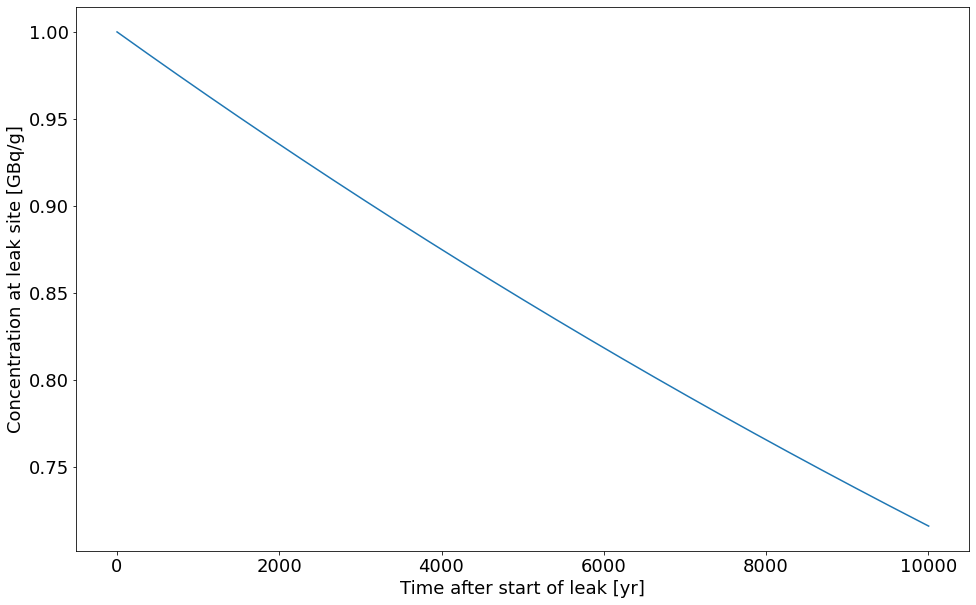

In [6]:
# Initial condition: concentration is 0 Bq/g everywhere except at x = 0,
# where it is 1 Bq/g
c0 = np.zeros((Nx,1))
c0[0] = 1
# Initial condition: concentration is 0 GBq/g everywhere except at x = 0,
# where it is 1 Bq/g
ct = np.zeros((Nt))
csource = 1
# Boundary condition: concentration decreases at a rate of k_tank [yr-1]
for i in np.arange(Nt):
    # Get initial conditions
    if (i==0):
        ct[i] = csource
    else:
        ct[i] = ct[i-1]-(ct[i-1]*k_tank)

plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 18})
plt.plot(t,ct)
plt.xlabel('Time after start of leak [yr]')
plt.ylabel('Concentration at leak site [GBq/g]')
plt.show()

### Preallocate Container for Solution

In [7]:
C = np.zeros((Nx,Nt))
# Boundary condition: concentration is 1 Bq/g at x = 0 for all times
cx0 = np.zeros((Nt))
cx0[0:19] = 1.0

### Compute Solution

In [8]:

    
for i in np.arange(Nt):
    
    # Get initial conditions
    if (i==0):
        Cprev = c0
    else:
        Cprev = C[:,i-1]
    
    Cnext = np.zeros((Nx))
    
    for j in np.arange(Nx):
        
        if (j==0):
            Cnext[0] = ct[i]
        else:
            Cnext[j] = Cprev[j] + q*(dt/dx)*(Cprev[j-1] - Cprev[j])
        
    C[:,i] = Cnext

### Plot solutions

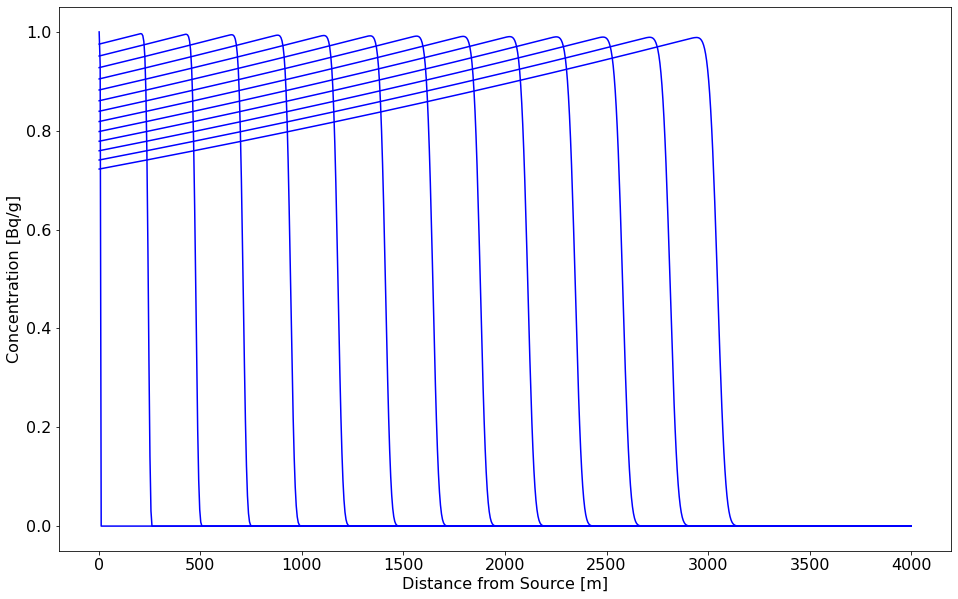

In [9]:
## First off, let's change the font size for all of our plots to be more legible
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(16,10))

for p in np.arange(0,Nt,50):
    plt.plot(x,C[:,p],'b')


plt.ylabel('Concentration [Bq/g]')
plt.xlabel('Distance from Source [m]')
plt.show()

/var/folders/zj/q0y8d02s78qgbn3myfjv53vw0000gn/T/ipykernel_1499/3629902773.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(tt,xx,C,cmap='plasma')


Text(0, 0.5, 'Time [years]')

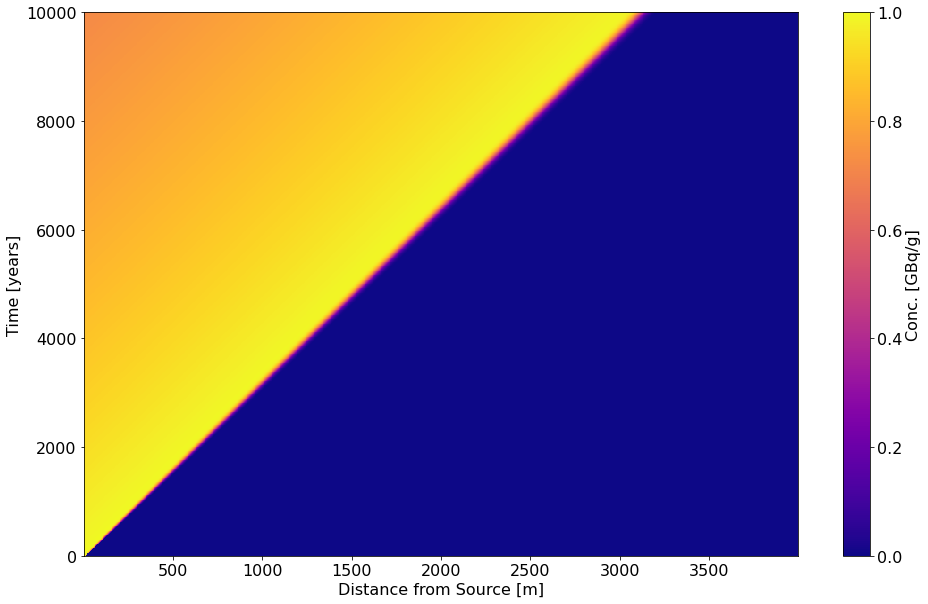

In [10]:
xx,tt = np.meshgrid(t,x)

plt.figure(figsize=(16,10))

plt.pcolormesh(tt,xx,C,cmap='plasma') 

plt.colorbar(label='Conc. [GBq/g]')
plt.xlabel('Distance from Source [m]')
plt.ylabel('Time [years]')


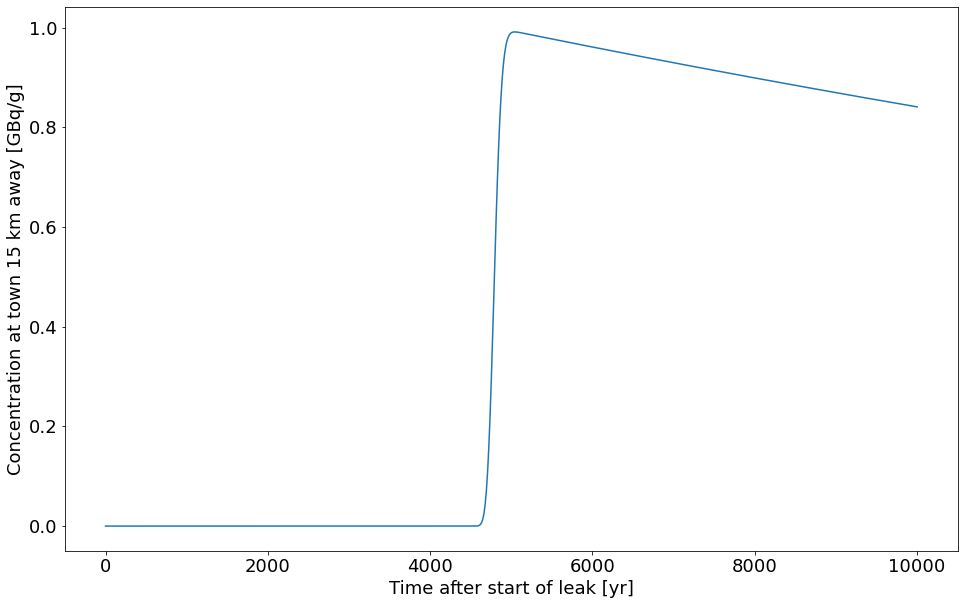

In [11]:
breakthrough = C[300,:]
plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 18})
plt.plot(t,breakthrough)
plt.xlabel('Time after start of leak [yr]')
plt.ylabel('Concentration at town 15 km away [GBq/g]')
plt.show()

In [17]:
breakthrough[299]

1.2218592198557198e-09

In [19]:
t[299]

4485.0

In [34]:
t0 = 0.0 # Time that the tank broke
tf = 100000.0 # End of simulation time

t = np.arange(t0,tf+dt,dt)
Nt = t.size
print('The number of time steps: Nt = ' + str(Nt))

The number of time steps: Nt = 6668


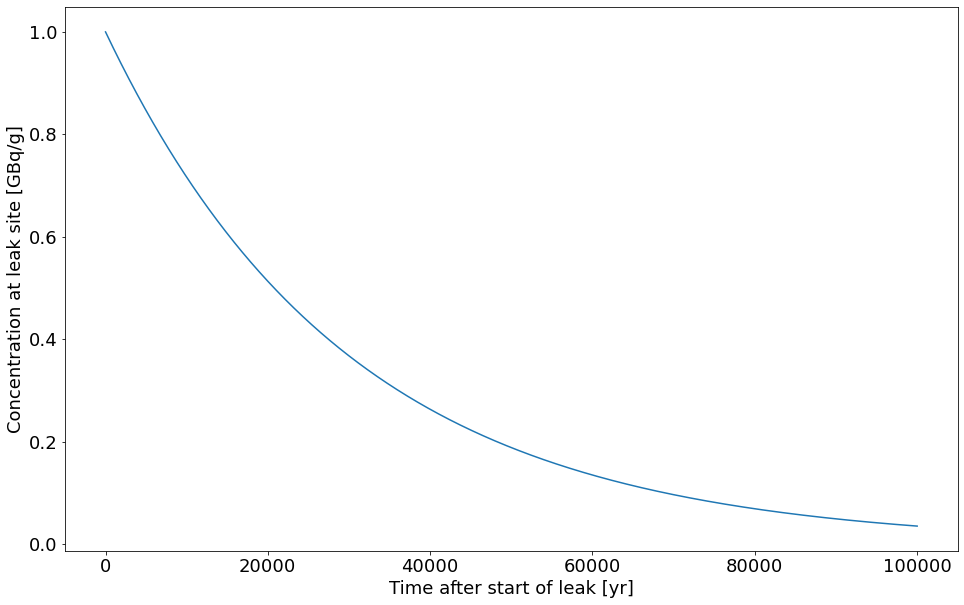

In [35]:
C = np.zeros((Nx,Nt))
# Boundary condition: concentration is 1 Bq/g at x = 0 for all times
cx0 = np.zeros((Nt))
cx0[0:19] = 1.0

# Initial condition: concentration is 0 Bq/g everywhere except at x = 0,
# where it is 1 Bq/g
c0 = np.zeros((Nx,1))
c0[0] = 1
# Initial condition: concentration is 0 GBq/g everywhere except at x = 0,
# where it is 1 Bq/g
ct = np.zeros((Nt))
csource = 1
# Boundary condition: concentration decreases at a rate of k_tank [yr-1]
for i in np.arange(Nt):
    # Get initial conditions
    if (i==0):
        ct[i] = csource
    else:
        ct[i] = ct[i-1]-(ct[i-1]*k_tank)

plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 18})
plt.plot(t,ct)
plt.xlabel('Time after start of leak [yr]')
plt.ylabel('Concentration at leak site [GBq/g]')
plt.show()

In [36]:

    
for i in np.arange(Nt):
    
    # Get initial conditions
    if (i==0):
        Cprev = c0
    else:
        Cprev = C[:,i-1]
    
    Cnext = np.zeros((Nx))
    
    for j in np.arange(Nx):
        
        if (j==0):
            Cnext[0] = ct[i]
        else:
            Cnext[j] = Cprev[j] + q*(dt/dx)*(Cprev[j-1] - Cprev[j])
        
    C[:,i] = Cnext

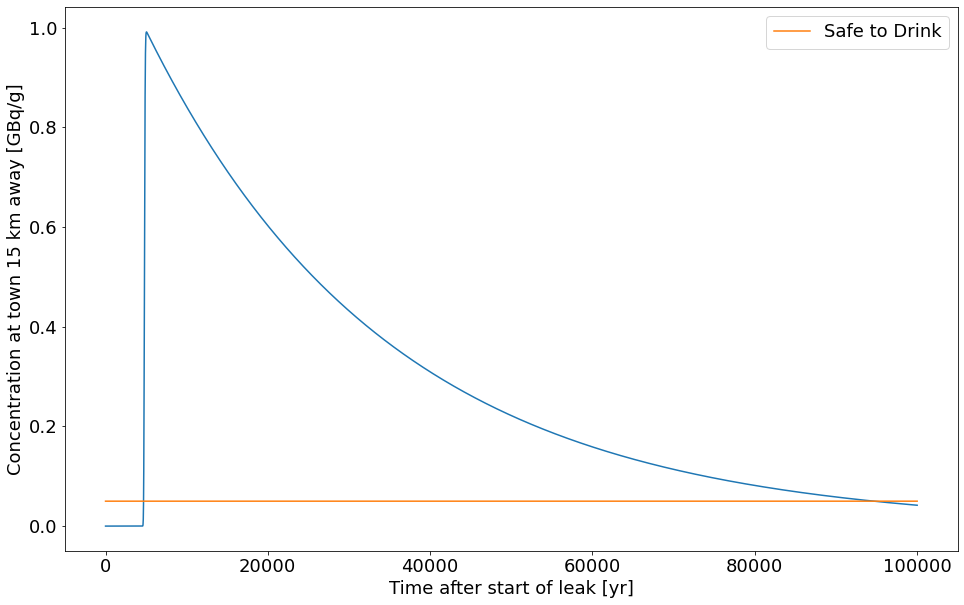

In [48]:
safe = 0.05
safe = np.full((Nt), safe)

breakthrough = C[300,:]
plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 18})
plt.plot(t,breakthrough)
plt.plot(t,safe,label='Safe to Drink')
plt.xlabel('Time after start of leak [yr]')
plt.ylabel('Concentration at town 15 km away [GBq/g]')
plt.legend()
plt.show()

NameError: name 'find' is not defined